In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import pandas as pd

In [3]:
X,y=sklearn.datasets.make_blobs(n_samples=200,centers=2,n_features=2,center_box=(1,10),random_state=40)

In [4]:
X

array([[ 3.6167052 ,  1.57961746],
       [ 7.92676273,  3.28040394],
       [ 6.45429488,  2.47523512],
       [ 4.70091004,  2.77093422],
       [ 3.36656555,  1.33146869],
       [ 4.78367315,  1.58635772],
       [ 4.89381711,  1.81561391],
       [ 8.44369848,  3.12828314],
       [ 3.55711828,  1.47759158],
       [ 7.86322938,  3.45887831],
       [ 8.39902634,  3.03185147],
       [ 6.69997146,  6.09404787],
       [ 8.84523663,  2.85576568],
       [ 8.7365403 ,  2.33823657],
       [ 3.82301285,  1.06486544],
       [ 8.31114697,  3.88364617],
       [ 3.65217623,  1.36460133],
       [ 7.57811248,  3.56819424],
       [ 2.82113271,  1.67084343],
       [ 3.17706866,  2.1099599 ],
       [ 8.62870471,  3.96509142],
       [ 7.9369443 ,  1.9948313 ],
       [ 7.84275581,  2.77467325],
       [ 4.93801462, -0.24308284],
       [ 4.69925939,  0.39037919],
       [ 8.05493579,  3.93770519],
       [ 8.10485227,  2.58149988],
       [ 7.61121627,  2.60602905],
       [ 7.51571628,

In [5]:
y

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [6]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


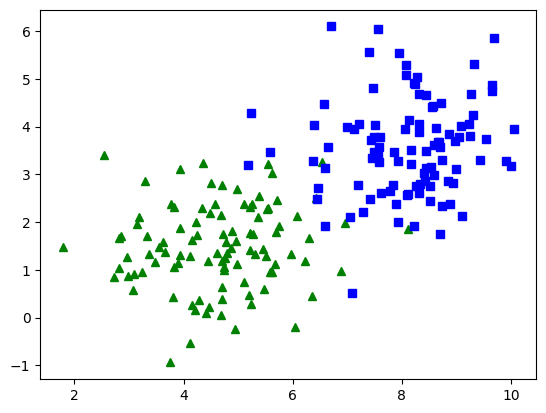

In [7]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.show()

In [8]:
learning_rate=1e-4
learning_rate

0.0001

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def forward(x,w):
    z=np.matmul(x,w)
    return z


In [11]:
#enumerate
# a=[1,2,3]
# for a,b in enumerate(a):
#     print(a,b)

In [12]:
# y_hat=[1,8.9,3.8,4]
# y=[0.2,0.9,0.4,0.78]
# y[0]
# for index,val in enumerate(y_hat):
#     predicted=val
#     actual_ko_index=index
#     y_ko_value=y[index]
#     print(actual_ko_index,predicted,y_ko_value)

In [ ]:
# def loss_(y_hat:list,y:list):
#     loss=0
#     for index,val in enumerate(y_hat):
#         predicted=val
#         actual=y[index]
#         loss-=(actual*np.log(val)+(1-actual)*np.log(1-predicted))           enumerate reteurns the index and value of the index of the list
#     loss=loss/ y.shape
#     return float(loss)

def loss_(y_hat: list, y: list):
  loss=0
  for index,val in enumerate(y_hat):
      predicted = val
      actual=y[index]
      loss-=(actual*np.log(val)+(1-actual)*np.log(1-predicted))
  loss = loss/ len(y)
  return float(loss)

In [14]:
# y_hat = [0.9, 0.2, 0.8, 0.1]
# y     = [1,   0,   1,   0]

# loss_(y_hat,y)

In [15]:
# y.shape[0]
# len(y)

In [66]:
losses=[]
def backpropagation(x,y,epochs,w):
    for i in range(epochs):
        z=forward(x,w)
        y_hat=sigmoid(z)
        dl_dy_hat=-(y/y_hat -(1-y)/(1-y_hat))
        dy_hat_dz=y_hat*(1-y_hat)
        dl_dz=dl_dy_hat*dy_hat_dz
        dl_dw=np.matmul(x.T,dl_dz)
        w=w-learning_rate*(dl_dw)
        l=loss_(y_hat,y)
        losses.append(l)
        print(f'Loss at {i} is {loss_(y_hat,y):.3f}')
    plt.plot(losses)
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()

    return w

In [67]:
w=np.random.rand(3,1)
w

array([[0.69705564],
       [0.21774022],
       [0.31257701]])

In [68]:
ones_=np.ones((X.shape[0],1))
ones_

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [69]:
ones_.shape

(200, 1)

In [70]:
x=np.concatenate((ones_,X),axis=1)
x

array([[ 1.        ,  3.6167052 ,  1.57961746],
       [ 1.        ,  7.92676273,  3.28040394],
       [ 1.        ,  6.45429488,  2.47523512],
       [ 1.        ,  4.70091004,  2.77093422],
       [ 1.        ,  3.36656555,  1.33146869],
       [ 1.        ,  4.78367315,  1.58635772],
       [ 1.        ,  4.89381711,  1.81561391],
       [ 1.        ,  8.44369848,  3.12828314],
       [ 1.        ,  3.55711828,  1.47759158],
       [ 1.        ,  7.86322938,  3.45887831],
       [ 1.        ,  8.39902634,  3.03185147],
       [ 1.        ,  6.69997146,  6.09404787],
       [ 1.        ,  8.84523663,  2.85576568],
       [ 1.        ,  8.7365403 ,  2.33823657],
       [ 1.        ,  3.82301285,  1.06486544],
       [ 1.        ,  8.31114697,  3.88364617],
       [ 1.        ,  3.65217623,  1.36460133],
       [ 1.        ,  7.57811248,  3.56819424],
       [ 1.        ,  2.82113271,  1.67084343],
       [ 1.        ,  3.17706866,  2.1099599 ],
       [ 1.        ,  8.62870471,  3.965

In [71]:
a=[[1,2,3]]
b=[[4,5,6]]
print(np.concatenate((a,b),axis=0))

[[1 2 3]
 [4 5 6]]


In [72]:
r=np.array([200,122])
r=r.reshape(r.shape[0],1)
r

array([[200],
       [122]])

In [73]:
y.shape[0]

200

In [74]:
y=y.reshape(y.shape[0],1)

In [75]:
y

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [76]:
y.shape

(200, 1)

Loss at 0 is 1.159
Loss at 1 is 1.072
Loss at 2 is 0.994
Loss at 3 is 0.925
Loss at 4 is 0.868
Loss at 5 is 0.822
Loss at 6 is 0.787
Loss at 7 is 0.760
Loss at 8 is 0.742
Loss at 9 is 0.729
Loss at 10 is 0.721
Loss at 11 is 0.715
Loss at 12 is 0.712
Loss at 13 is 0.709
Loss at 14 is 0.707
Loss at 15 is 0.706
Loss at 16 is 0.705
Loss at 17 is 0.704
Loss at 18 is 0.704
Loss at 19 is 0.703
Loss at 20 is 0.702
Loss at 21 is 0.701
Loss at 22 is 0.701
Loss at 23 is 0.700
Loss at 24 is 0.700
Loss at 25 is 0.699
Loss at 26 is 0.698
Loss at 27 is 0.698
Loss at 28 is 0.697
Loss at 29 is 0.697
Loss at 30 is 0.696
Loss at 31 is 0.695
Loss at 32 is 0.695
Loss at 33 is 0.694
Loss at 34 is 0.694
Loss at 35 is 0.693
Loss at 36 is 0.692
Loss at 37 is 0.692
Loss at 38 is 0.691
Loss at 39 is 0.691
Loss at 40 is 0.690
Loss at 41 is 0.690
Loss at 42 is 0.689
Loss at 43 is 0.688
Loss at 44 is 0.688
Loss at 45 is 0.687
Loss at 46 is 0.687
Loss at 47 is 0.686
Loss at 48 is 0.686
Loss at 49 is 0.685
Loss at 50

/var/folders/vy/fch6w1_x1l75t7_9zqnljtt80000gn/T/ipykernel_1376/1710672224.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(loss)


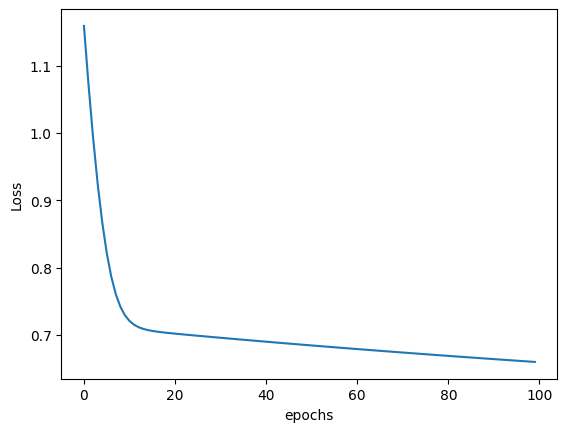

In [77]:
model=backpropagation(x,y,100,w)